# Лабораторная работа №5. Метод Монте-Карло

Решить систему линейных уравнений, используя метод Монте-Карло. 

1.	Решить систему линейных алгебраических уравнений   методом Монте-Карло. 
2.	Сравнить с решением данного уравнения, полученным в произвольном математическом пакете.
3.	Построить график зависимости точности решения от длины цепи маркова и числа смоделированных цепей маркова.


In [ ]:
import random
from scipy.linalg import solve
from matplotlib import pyplot

x = [[]]

def step_markov(state, P, size):
    r = random.random()
    for i in range(size):
        r -= P[state][i]
        if r <= 0:
            return i
    return size - 1


def model_markov(A, f, P, start, depth):
    Q = 1
    sum = 0
    old = start

    for i in range(depth):
        new = step_markov(old, P, len(P[old]))

        if P[old][new] > 0:
            Q = Q * A[old][new] / P[old][new]
        else:
            Q = 0
        sum += Q * f[new]
        old = new

    return sum


def slae_solve(A, f, depth, iterations):
    P = []
    size = len(A)
    B = []

    for i in range(size):
        B.append([])
        P.append([])
        for j in range(size):
            if i == j:
                B[i].append(1 - A[i][j])
            else:
                B[i].append(-A[i][j])
            P[i].append(1 / size)

    answer = []
    for coord in range(size):
        sum = 0
        x.append([])
        for i in range(iterations):
            e = model_markov(B, f, P, coord, depth)
            sum += e
            x[coord].append(f[coord] + sum / iterations)

        answer.append(f[coord] + sum / iterations)
    return answer

A = [
    [0.7, -0.2, 0.3],
    [0.5, 1.3, 0.1],
    [-0.1, 0.4, 1.3]
]
f = [-2, -3,2]

result = slae_solve(A, f, 100, 10000)




In [ ]:
print("My result:")
print(result)
pythonX = solve(A, f)
print("Python result:")
print(pythonX)

My result:
[-3.8102584345897776, -0.966696178752255, 1.5146890376761246]
Python result:
[-3.7950938  -0.96681097  1.54401154]


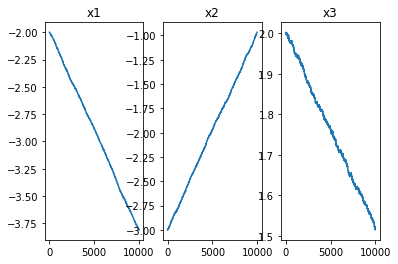

In [ ]:

pyplot.subplot(1,3,1)
pyplot.title("x1")
pyplot.plot(x[0])

pyplot.subplot(1,3,2)
pyplot.title("x2")
pyplot.plot(x[1])

pyplot.subplot(1,3,3)
pyplot.title("x3")
pyplot.plot(x[2])

pyplot.show()

In [ ]:
import math
print((math.sin(0.235)*(math.exp()**0.235)/0.235 + math.sin(0.125)*(math.exp()**0.125)/0.125 + math.sin(0.48)*(math.exp()**0.48)/0.48 + math.sin(0.781)*(math.exp()**0.781)/0.781 + math.sin(0.930)*(math.exp()**0.93)/0.930) /5)

0.9427223158016724
